# Модульное задание 2
**Выполнила: Айдин кызы Аделя**

### Задание 1: Полиномиальная регрессия

Источник данных:
https://rosstat.gov.ru/folder/12781

Формулировка задачи исследования: исследуем зависимость численности населения (целевой переменной) от других показателей: браков, разводов, миграционного прироста, материнской и младенческой смертности.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox, mannwhitneyu, fligner, ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns

In [ ]:
data = pd.read_excel('data_minor_3.xls')

# Проверка данных
print(data.head())
print(data.info())

   Годы  Браки на 1000 человек населения  Разводы на 1000 человек населения  \
0  2001                              6.9                                5.3   
1  2002                              7.1                                5.9   
2  2003                              7.5                                5.5   
3  2004                              6.8                                4.4   
4  2005                              7.4                                4.2   

   Население, млн. человек  Миграционный прирост, чел.  \
0                    146.3                       81781   
1                    145.2                       87149   
2                    145.0                       43884   
3                    144.3                       41275   
4                    143.8                      107432   

   Материнская смертность, чел  \
0                          479   
1                          469   
2                          463   
3                          352   
4     

In [ ]:
data.describe()

,Годы,Браки на 1000 человек населения,Разводы на 1000 человек населения,"Население, млн. человек","Миграционный прирост, чел.","Материнская смертность, чел",Младенческая смертность на 1000 родившихся живыми
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2011.500000,7.509091,4.600000,145.095455,196337.090909,292.500000,8.174227
std,6.493587,1.005655,0.492805,2.012219,106602.646727,119.200411,2.986328
min,2001.000000,5.300000,3.900000,142.700000,41275.000000,134.000000,4.444000
25%,2006.250000,6.825000,4.200000,143.200000,106713.500000,190.000000,5.700000
50%,2011.500000,7.450000,4.500000,144.650000,225910.500000,293.000000,7.800000
75%,2016.750000,8.400000,4.775000,147.150000,279314.250000,366.000000,10.000000
max,2022.000000,9.200000,5.900000,147.900000,429902.000000,482.000000,14.600000


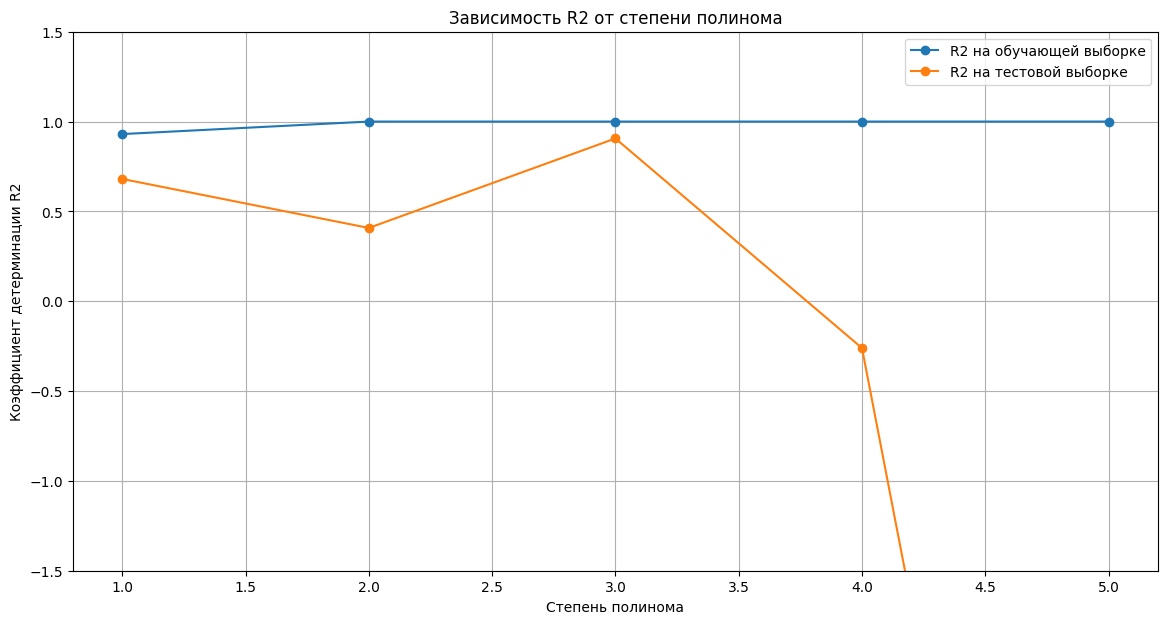

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X = data.drop('Население, млн. человек', axis=1)
y = data['Население, млн. человек']

# Разделяем выборку на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Построение полиномиальной регрессии с разной степенью
train_errors = []
test_errors = []
r2_train_scores = []
r2_test_scores = []

max_degree = 5  # Проверим полиномы до 5-й степени

for degree in range(1, max_degree + 1):
    # Полиномиальное преобразование признаков
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Предсказания
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Вычисление ошибок и R2
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    r2_train_scores.append(r2_score(y_train, y_train_pred))
    r2_test_scores.append(r2_score(y_test, y_test_pred))



# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_degree + 1), r2_train_scores, label='R2 на обучающей выборке', marker='o')
plt.plot(range(1, max_degree + 1), r2_test_scores, label='R2 на тестовой выборке', marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Коэффициент детерминации R2')
plt.title('Зависимость R2 от степени полинома')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.show()

In [ ]:
print(r2_train_scores)
print(r2_test_scores)

# Анализ переобучения
optimal_degree = np.argmax(r2_test_scores) + 1  # Находим степень с максимальным R2 на тесте
print(f"Оптимальная степень полинома: {optimal_degree}")

[0.9303328945075993, 1.0, 1.0, 1.0, 1.0]
[0.6806238658261159, 0.40779066706483336, 0.9059553398025654, -0.26078851443790096, -7.371787641735436]
Оптимальная степень полинома: 3



Когда степень полинома растёт, модель подгоняется к шуму в обучающих данных.
Это видно по R2=1 на обучающей выборке и низким значениям на тестовой.


Из графика видно, что степень 3 является оптимальной:
На тестовой выборке R2 на этих степенях максимален, и значения на обучающих и тестовых данных ещё не сильно отличаются.

Если даже для низких степеней полинома разница на обучающих и тестовых данных значительная, можно утверждать, что полиномиальная регрессия не подходит для данной задачи.

### Задание 2: PCA


In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Вычисляем долю объяснённой дисперсии
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Определяем количество компонент для 70% дисперсии
n_components = np.argmax(explained_variance_ratio >= 0.7) + 1
print(f"Кол-во компонент для объяснения 70% дисперсии: {n_components}")

# Применяем PCA с нужным числом компонент
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Интерпретируем главные компоненты
print("Коэффициенты главных компонент:")
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(n_components)])
print(components_df)

Кол-во компонент для объяснения 70% дисперсии: 2
Коэффициенты главных компонент:
         Годы  Браки на 1000 человек населения  \
PC1 -0.506982                         0.172221   
PC2  0.001083                         0.719489   

     Разводы на 1000 человек населения  Миграционный прирост, чел.  \
PC1                           0.446594                   -0.237232   
PC2                           0.135728                    0.674388   

     Материнская смертность, чел  \
PC1                     0.443062   
PC2                     0.043742   

     Младенческая смертность на 1000 родившихся живыми  
PC1                                           0.511156  
PC2                                          -0.084850  


**Первая главная компонента (PC1):**

Годы (-0.506982): основной отрицательный вклад.

Младенческая смертность (0.511156), Разводы (0.446594), Материнская смертность (0.443062): положительный вклад.

Миграционный прирост (-0.237232): отрицательный вклад.

PC1 отражает долгосрочные изменения в демографических и социальных показателях, связанных со здоровьем населения.

**Вторая главная компонента (PC2):**

Браки (0.719489) и Миграционный прирост (0.674388): основной положительный вклад.

Разводы (0.135728): небольшой положительный вклад.

PC2 отражает процессы, связанные с брачностью и миграцией.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка качества модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R2 на обучающей выборке: {train_r2:.4f}")
print(f"R2 на тестовой выборке: {test_r2:.4f}")

R2 на обучающей выборке: 0.6846
R2 на тестовой выборке: 0.3284


R² на обучающей выборке (0.68): модель объясняет 68% дисперсии данных на обучающей выборке. Это указывает на среднее качество модели при подгонке.

R² на тестовой выборке (0.33): модель объясняет 33% дисперсии данных на тестовой выборке. Низкий показатель на тестовой выборке говорит о том, что модель плохая и неуспешно выдает предсказания.

### Задание 3: Бинаризация и метрики качества

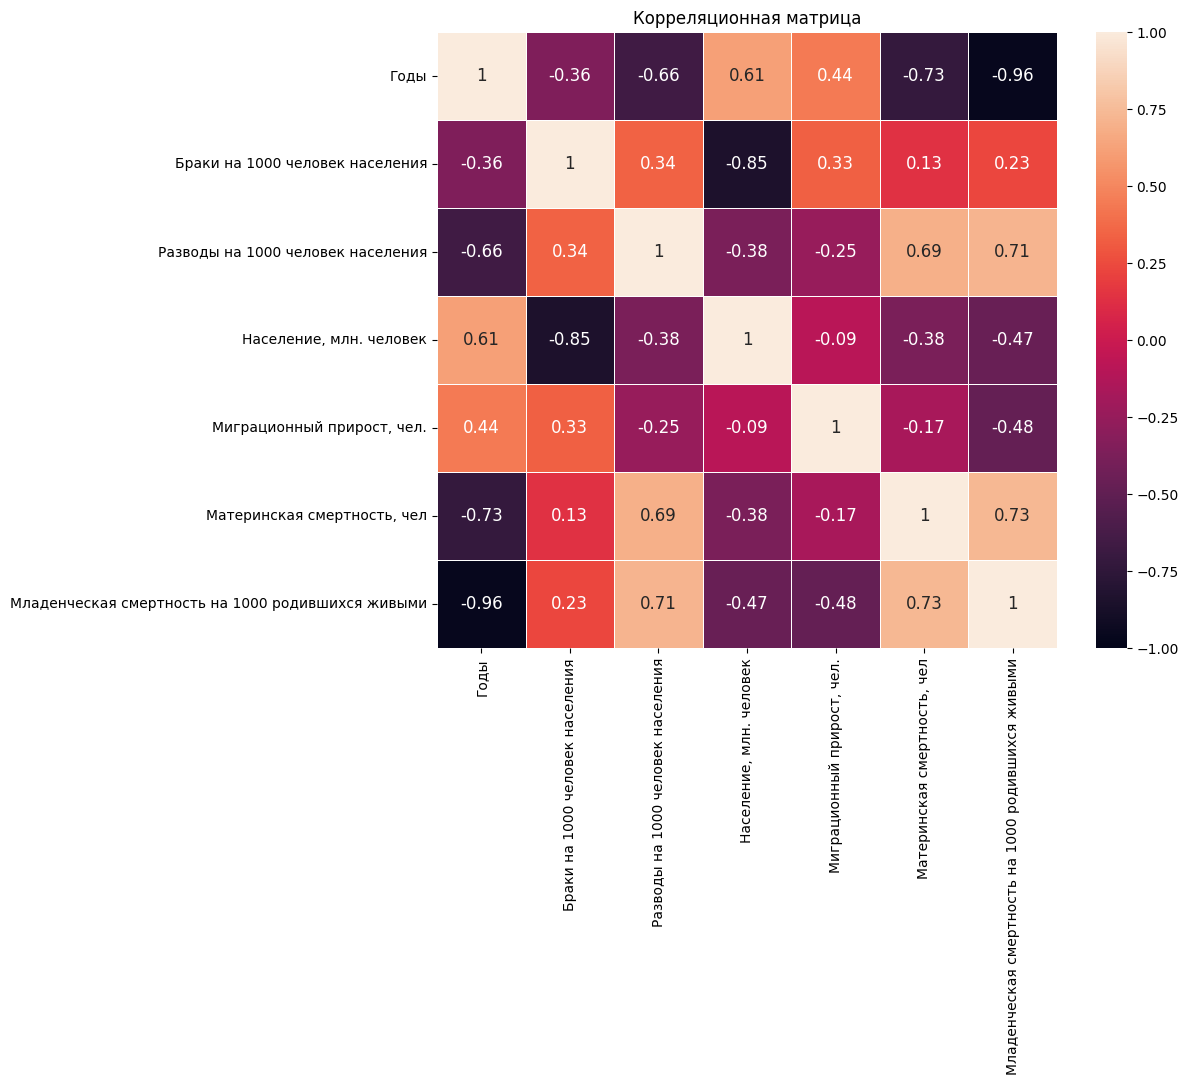

In [ ]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linecolor = 'white', linewidth = 0.5,
           annot_kws = {'size': 12}, vmax = 1, vmin = -1)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
columns_to_remove = ["Материнская смертность, чел"]  # Удаляем признак для устранения мультиколлинеарности
X = X.drop(columns=columns_to_remove)

Accuracy на обучении: 0.9333333333333333
Accuracy на тесте: 0.8571428571428571
Матрица ошибок на тесте:
 [[5 1]
 [0 1]]


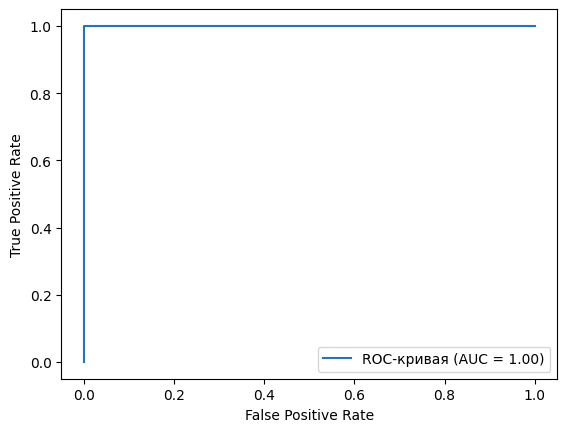

In [ ]:
# Бинаризация целевой переменной
q3 = y.quantile(0.75)
y_bin = (y > q3).astype(int)

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y_bin, test_size=0.3, random_state=7)

# Обучаем логистическую регрессию
from sklearn.linear_model import LogisticRegression
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train, y_train)

# Оценка модели
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y_pred_train = log_reg_pca.predict(X_train)
y_pred_test = log_reg_pca.predict(X_test)

print("Accuracy на обучении:", accuracy_score(y_train, y_pred_train))
print("Accuracy на тесте:", accuracy_score(y_test, y_pred_test))
print("Матрица ошибок на тесте:\n", confusion_matrix(y_test, y_pred_test))

# ROC-кривая
y_prob_test = log_reg_pca.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



Accuracy на обучении=93.33% означает, что модель правильно классифицировала 93.33% объектов на обучающей выборке. Высокий показатель говорит о хорошем обучении модели.

Accuracy на тесте=85.71%. Для тестовой выборки модель классифицировала правильно 85.71% объектов. Это достаточно высокий результат, который указывает на то, что модель не переобучена и хорошо обобщает данные.

Матрица ошибок указывает на то, что модель хорошо справляется с задачей классификации.
Площадь под ROC-кривой (AUC) близка к 1, что значит, модель имеет высокую эффективность.

In [ ]:
coeff_df = pd.DataFrame({
    'Feature': ['PC1', 'PC2'],  # Здесь можно указать ваши компоненты
    'Coefficient': model.coef_
})
# Выводим коэффициенты
print(coeff_df)

  Feature  Coefficient
0     PC1    -0.800750
1     PC2    -1.014051


PC1 (-0.800750): Увеличение значения первой главной компоненты снижает вероятность положительного исхода.

PC2 (-1.014051): Вторая главная компонента оказывает более сильное отрицательное влияние на вероятность положительного исхода.

In [ ]:
class_report = classification_report(y_test, y_pred_test)
print("Классификационный отчет:")
print(class_report)

Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7



Accuracy составляет 86%, что указывает на хорошее качество модели. Однако модель склонна предсказывать класс 0 (высокая точность для этого класса), но имеет проблемы с предсказанием класса 1.

In [ ]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y_bin, test_size=0.3, random_state=12)
y_pred_train = log_reg_pca.predict(X_train)
y_pred_test = log_reg_pca.predict(X_test)
print("Accuracy на тесте:", accuracy_score(y_test, y_pred_test))
print("Матрица ошибок на тесте:\n", confusion_matrix(y_test, y_pred_test))

Accuracy на тесте: 0.7142857142857143
Матрица ошибок на тесте:
 [[4 2]
 [0 1]]


In [ ]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y_bin, test_size=0.3, random_state=67)
y_pred_train = log_reg_pca.predict(X_train)
y_pred_test = log_reg_pca.predict(X_test)
print("Accuracy на тесте:", accuracy_score(y_test, y_pred_test))
print("Матрица ошибок на тесте:\n", confusion_matrix(y_test, y_pred_test))

Accuracy на тесте: 0.8571428571428571
Матрица ошибок на тесте:
 [[5 1]
 [0 1]]


На других выборках модель показала также неплохие результаты.

#### При построении следующих моделей использовались компоненты в качестве признаков, так как из-за высокой корреляции между признаками и небольшого объема выборки качество моделей получалось слишком низким.

### Задание 4: Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Определим возможные значения для гиперпараметров
param_grid = {
    'n_estimators': [5, 10, 15, 20],  # Количество деревьев
    'max_depth': [2, 3, 5, 10, None]  # Глубина деревьев
}

rf = RandomForestClassifier(random_state=7)

# Инициализация GridSearchCV для подбора параметров
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Обучаем модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшие параметры модели
best_params = grid_search.best_params_
print("Лучшие параметры модели:", best_params)

Лучшие параметры модели: {'max_depth': 2, 'n_estimators': 15}


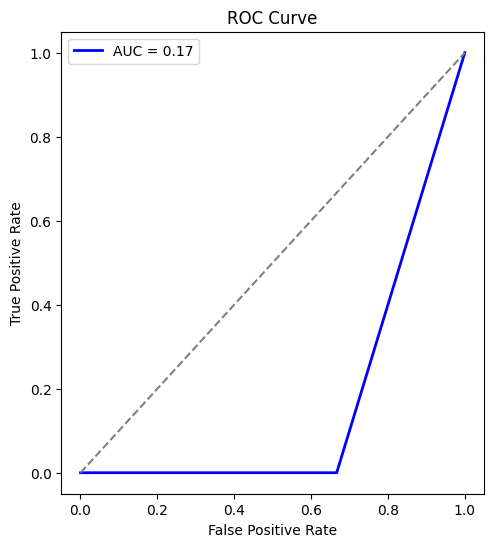

Accuracy на обучении: 1.0
Accuracy на тесте: 0.8571428571428571
[[6 0]
 [1 0]]


In [ ]:
# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка качества модели на обучении и тесте
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_test_pred)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Выводим точности на обучающей и тестовой выборках
print(f"Accuracy на обучении: {train_accuracy}")
print(f"Accuracy на тесте: {test_accuracy}")
print(conf_matrix)

Модель показала перевышение точности на обучающей выборке (Accuracy = 1.0), что указывает на возможное переобучение. На тестовой выборке Accuracy составила 0.86, но модель не смогла правильно классифицировать класс 1 (по матрице ошибок). Это может быть связано с дисбалансом классов или недостаточной сложностью данных для данной модели.

In [ ]:
# Важность признаков
print("Важность признаков (PCA компоненты):")
for i, importance in enumerate(best_model.feature_importances_):
    print(f"PC{i+1}: {importance:.4f}")


# 6. Оценка методом Шэпли
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
# Усреднение абсолютных значений SHAP для каждой компоненты
shap_importance = np.mean(np.abs(shap_values[1]), axis=0)

# Вывод результатов
print("Важность признаков методом Шэпли (среднее абсолютное значение):")
for i, feature in enumerate(["PC1", "PC2"]):
    print(f"{feature}: {shap_importance[i]:.4f}")

Важность признаков (PCA компоненты):
PC1: 0.5038
PC2: 0.4962
Важность признаков методом Шэпли (среднее абсолютное значение):
PC1: 0.1880
PC2: 0.1880


Обе PCA-компоненты (PC1 и PC2) имеют схожую важность в модели случайного леса, согласно классической оценке важности (0.5038 и 0.4962 соответственно). Метод Шэпли подтверждает равный вклад этих компонентов в предсказания, так как их средние абсолютные значения SHAP идентичны (0.1880). Это указывает на равномерное влияние обеих компонент на качество модели.

### Задание 5б: XGBoost и задача регрессии

In [ ]:
import xgboost as xgb

# Построение модели XGBoost для регрессии
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=15, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
# Оценка модели XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Построение модели линейной регрессии для сравнения
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Оценка модели линейной регрессии
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Вывод результатов
print("Модель XGBoost:")
print(f"R2: {r2_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")

print("\nМодель Линейной Регрессии:")
print(f"R2: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")

print("\nВажность признаков (XGBoost):")
print(xgb_model.feature_importances_)


# Получаем важность признаков по gain и total_gain
booster = xgb_model.get_booster()
importance_gain = booster.get_score(importance_type='gain')
importance_total_gain = booster.get_score(importance_type='total_gain')
print(importance_gain, importance_total_gain)



Модель XGBoost:
R2: -0.0325
MSE: 0.1264

Модель Линейной Регрессии:
R2: -0.7461
MSE: 0.2138

Важность признаков (XGBoost):
[1. 0.]
{'f0': 1.0813802480697632} {'f0': 16.220703125}


XGBoost:
R2 = -0.0325: Это указывает на то, что модель XGBoost плохо объясняет вариацию целевой переменной. Отрицательное значение R2 означает, что модель хуже просто среднего предсказателя, который бы всегда прогнозировал среднее значение целевой переменной.
MSE = 0.1264: Среднеквадратичная ошибка относительно неплохая.

Линейная регрессия:
R2 = -0.7461: Модель линейной регрессии работает еще хуже, чем XGBoost, так как значение R2 значительно ниже.
MSE = 0.2138: Среднеквадратичная ошибка выше, что также подтверждает худшее качество модели линейной регрессии.

Вывод: Модель XGBoost дает лучшие результаты по метрике MSE, несмотря на низкий R2. В данном контексте XGBoost выглядит более подходящей моделью для решения задачи регрессии, чем линейная регрессия, так как она показывает более низкую ошибку.

Важность признаков (XGBoost):
[1. 0.]: Это указывает, что модель XGBoost использует только первый признак (f0), и второй признак не имеет значимого влияния на модель. Это можно интерпретировать как то, что только первый признак оказывает влияние на предсказания.
{'f0': 1.0813802480697632}: Важность первого признака (f0) по метрике gain — чем выше это значение, тем больше вклад этого признака в улучшение модели.
{'f0': 16.220703125}: Важность первого признака по total gain. Это подтверждает, что f0 значительно влияет на модель в общем, улучшая предсказания.

Сравнение двух моделей классификации (на основе полученных ранее результатов)

Логистическая регрессия и Случайный лес показывают одинаковую точность на тестовой выборке, равную 0.8571. Это означает, что обе модели правильно классифицируют 85.7% случаев.

Логистическая регрессия имеет AUC = 1, что говорит о том, что модель идеально разделяет классы (отличная способность разделения).
Случайный лес имеет AUC = 0.17, что является очень низким значением и указывает на то, что модель плохо разделяет классы, и может быть близка к случайному угадыванию (AUC ≈ 0.5 для случайного выбора).

Логистическая регрессия является предпочтительной моделью в этом случае, поскольку она не только достигает такой же точности, но и демонстрирует отличные результаты по AUC, что говорит о её хорошей способности к разделению классов.
Случайный лес требует дополнительной настройки гиперпараметров или проверки на переобучение, так как его AUC значительно ниже, что свидетельствует о проблемах с разделением классов.

### Задание 6: Ассоциативные правила

In [ ]:
from sklearn.preprocessing import Binarizer
from mlxtend.frequent_patterns import apriori, association_rules

binarizer = Binarizer(threshold=np.median(X))
X_bin = binarizer.fit_transform(X)

# Преобразуем в DataFrame для удобства
X_bin_df = pd.DataFrame(X_bin)

print(X_bin_df)

      0    1    2    3    4
0   1.0  0.0  0.0  1.0  1.0
1   1.0  0.0  0.0  1.0  1.0
2   1.0  0.0  0.0  1.0  1.0
3   1.0  0.0  0.0  1.0  1.0
4   1.0  0.0  0.0  1.0  1.0
5   1.0  0.0  0.0  1.0  1.0
6   1.0  1.0  0.0  1.0  1.0
7   1.0  0.0  0.0  1.0  0.0
8   1.0  0.0  0.0  1.0  0.0
9   1.0  0.0  0.0  1.0  0.0
10  1.0  1.0  0.0  1.0  0.0
11  1.0  0.0  0.0  1.0  1.0
12  1.0  0.0  0.0  1.0  0.0
13  1.0  0.0  0.0  1.0  0.0
14  1.0  0.0  0.0  1.0  0.0
15  1.0  0.0  0.0  1.0  0.0
16  1.0  0.0  0.0  1.0  0.0
17  1.0  0.0  0.0  1.0  0.0
18  1.0  0.0  0.0  1.0  0.0
19  1.0  0.0  0.0  1.0  0.0
20  1.0  0.0  0.0  1.0  0.0
21  1.0  0.0  0.0  1.0  0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Применение алгоритма Apriori
frequent_itemsets = apriori(X_bin_df, min_support=0.1, use_colnames=True)

# Генерация ассоциативных правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=2)

# Выводим результаты
print("Apriori - Ассоциативные правила:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Apriori - Ассоциативные правила:
  antecedents consequents   support  confidence  lift
0         (0)         (3)  1.000000    1.000000   1.0
1         (3)         (0)  1.000000    1.000000   1.0
2         (0)         (4)  0.363636    0.363636   1.0
3         (4)         (0)  0.363636    1.000000   1.0
4         (3)         (4)  0.363636    0.363636   1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Результаты показывают два ассоциативных правила:


Признаки 0 и 3 всегда встречаются вместе в данных с уверенностью 100%.
Аналогично, признаки 3 и 0 также всегда встречаются вместе.
Признаки 0 и 4 встречаются вместе в 36.4% случаев, с уверенностью 36.4%.
Признаки 4 и 0 также встречаются вместе в 36.4% случаев с уверенностью 100%.
Признаки 3 и 4 встречаются вместе в 36.4% случаев с уверенностью 36.4%.
Lift для всех правил равен 1, что означает, что сочетания признаков не увеличивают вероятность появления друг друга, т.е. они не зависят друг от друга больше, чем случайным образом.

In [ ]:
!pip install pyfpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5489 sha256=0fdc6dd3e2e4248cf983b4300ac0e99ee7b3f26904ac7c0fe9477f014372e2a8
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
# Применение FP-Growth
import pyfpgrowth

patterns = pyfpgrowth.find_frequent_patterns(X_bin.tolist(), 3)
rules_fp = pyfpgrowth.generate_association_rules(patterns, 0.6)

print("FP-Growth - Ассоциативные правила:")
print(rules_fp)

FP-Growth - Ассоциативные правила:
{(1.0, 1.0, 1.0): ((0.0,), 1.6666666666666667), (0.0,): ((), 0.8392857142857143), (0.0, 1.0): ((), 0.7846153846153846), (0.0, 0.0): ((1.0,), 2.1702127659574466), (0.0, 0.0, 1.0): ((), 0.6176470588235294), (0.0, 1.0, 1.0): ((), 0.6774193548387096)}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Результаты FP-Growth показывают следующие ассоциативные правила:

(1.0, 1.0, 1.0) → (0.0) с поддержкой 1.67:
Когда признаки 1.0 встречаются в данных в трёх переменных, вероятность того, что
0.0 также появится, увеличивается. Это указывает на сильную связь между такими признаками.
(0.0) → () с поддержкой 0.839:
Признак 0.0 встречается в 83.9% случаев. Это довольно высокая частота появления, что может означать его значимость или популярность в данных.
(0.0, 1.0) → () с поддержкой 0.785:
Комбинация 0.0 и 1.0 встречается в 78.5% данных, но не приводит к каким-либо явным следствиям. Это говорит о том, что эти два признака часто встречаются вместе, но они не обязательно определяют появление других признаков.
(0.0, 0.0) → (1.0) с поддержкой 2.17:
Два признака 0.0 сильно ассоциированы с появлением признака 1.0. Это правило показывает более сильную зависимость, с более высокой поддержкой 2.17.
(0.0, 0.0, 1.0) → () с поддержкой 0.618:
Набор признаков 0.0,0.0,1.0 встречается в 61.8% данных, но не приводит к сильным следствиям, что говорит о наличии этого набора признаков без значительного влияния на другие переменные.
(0.0, 1.0, 1.0) → () с поддержкой 0.677:
Признаки 0.0,1.0,1.0 встречаются в 67.7% данных, но также не приводят к явным следствиям, что указывает на частое сочетание этих признаков, но без ярко выраженных зависимостей.
